Yulu - Hypothesis Testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Problem Statement:

            Yulu an indian technology driven micro_mobility service provider, which offers unique vehicles for the daily commute has recently suffered considerable dips in its success. The company wants to identify factors affecting the demand for these electric cycles. The company provided data about usage of electric cycles according to time of the day, workingday/holiday, season,weather,temperature etc. We can analyse the data in terms of distribution of usage of electric cycles based on these variables. And also we can apply suitable tests of significance like t_test, chisquared, Annova etc. to identify the variables that are significant in predicting the demand for these electric cycles in the Indian market. Developing strategies tailored to focus on these variables would help to improve the business.

In [2]:
df=pd.read_csv('yulu dataset.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape

(10886, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
print(min(df['datetime']),max(df['datetime']))

2011-01-01 00:00:00 2012-12-19 23:00:00


Given data is from jan 1st 2011 12:00am to dec 19th 2012 11:00pm for every one hour.

In [7]:
#  Changing datetime column data type from object to datetime datatype
df['datetime']=pd.to_datetime(df['datetime'])
df['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10886 entries, 0 to 10885
Series name: datetime
Non-Null Count  Dtype         
--------------  -----         
10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 85.2 KB


In [8]:
day_count=df.groupby(df['datetime'].dt.date)['count'].sum().reset_index()
day_count

,datetime,count
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
451,2012-12-15,5047
452,2012-12-16,3786
453,2012-12-17,4585
454,2012-12-18,5557


In this 456 days data is available for two years.

In [9]:
day_count['datetime']=pd.to_datetime(day_count['datetime'])
day_count.groupby(day_count['datetime'].dt.strftime('%m/%Y'))['count'].count()

datetime
01/2011    19
01/2012    19
02/2011    19
02/2012    19
03/2011    19
03/2012    19
04/2011    19
04/2012    19
05/2011    19
05/2012    19
06/2011    19
06/2012    19
07/2011    19
07/2012    19
08/2011    19
08/2012    19
09/2011    19
09/2012    19
10/2011    19
10/2012    19
11/2011    19
11/2012    19
12/2011    19
12/2012    19
Name: count, dtype: int64

For every month 19 days data is given.

In [10]:
day_holiday=df.groupby([df['datetime'].dt.date,'holiday'])['count'].sum().reset_index()
day_holiday

,datetime,holiday,count
0,2011-01-01,0,985
1,2011-01-02,0,801
2,2011-01-03,0,1349
3,2011-01-04,0,1562
4,2011-01-05,0,1600
...,...,...,...
451,2012-12-15,0,5047
452,2012-12-16,0,3786
453,2012-12-17,0,4585
454,2012-12-18,0,5557


In [11]:
day_holiday['holiday'].value_counts(normalize=True)

holiday
0    0.971491
1    0.028509
Name: proportion, dtype: float64

only 3% of days are holidays

In [12]:
day_working=df.groupby([df['datetime'].dt.date,'workingday'])['count'].sum().reset_index()
day_working

,datetime,workingday,count
0,2011-01-01,0,985
1,2011-01-02,0,801
2,2011-01-03,1,1349
3,2011-01-04,1,1562
4,2011-01-05,1,1600
...,...,...,...
451,2012-12-15,0,5047
452,2012-12-16,0,3786
453,2012-12-17,1,4585
454,2012-12-18,1,5557


In [13]:
day_working['workingday'].value_counts()

workingday
1    311
0    145
Name: count, dtype: int64

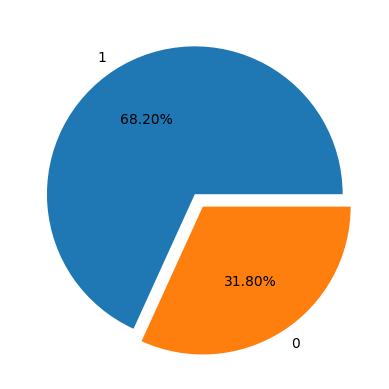

In [14]:
plt.pie(x=day_working['workingday'].value_counts(),labels=day_working['workingday'].value_counts().index,autopct='%0.2f%%',explode=(0,0.1))
plt.show()

68% of days are working days and 32% of days are non working days

Analysis on workingday and count variable for hourly data 

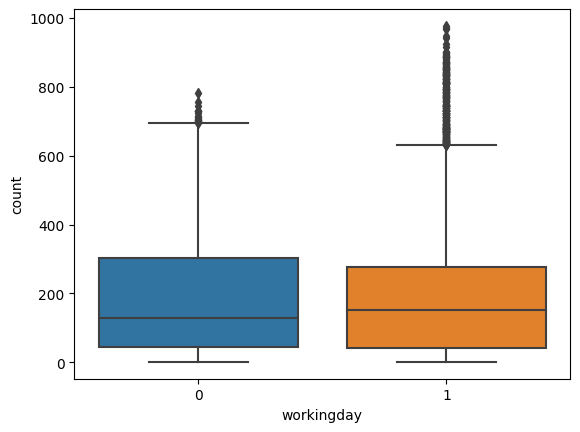

In [15]:
sns.boxplot(data=df,x='workingday',y='count')
plt.show()

Boxplot shows for working days median value is slightly more and also outliers are more compared to non working days

In [16]:
df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [17]:
def iqrlimit(x):
    l=np.percentile(x,25)
    h=np.percentile(x,75)
    iqr=h-l
    ll=l-iqr*1.5
    hl=h+iqr*1.5
    if ll<min(x):
        ll=min(x)
    if hl>max(x):
        hl=max(x)
    return ll,hl
df.groupby('workingday')['count'].apply(iqrlimit)

workingday
0    (1, 694.0)
1    (1, 631.0)
Name: count, dtype: object

Analysis on workingday and count variable for daily data

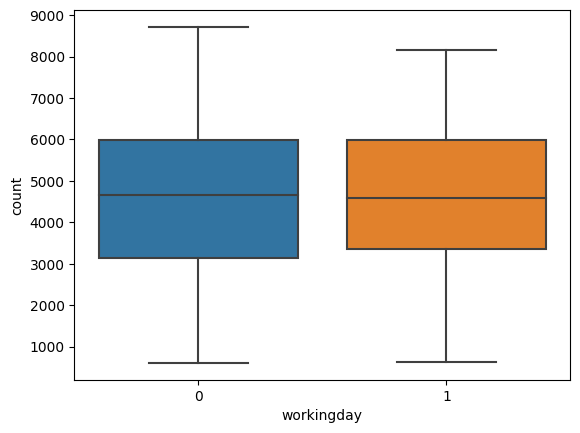

In [18]:
sns.boxplot(data=day_working,x='workingday',y='count')
plt.show()

Boxplot shows there was not much difference in median for both working days and non working days

In [19]:
day_working.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,145.0,4516.358621,1956.391735,605.0,3126.0,4649.0,5976.0,8714.0
1,311.0,4600.012862,1829.065314,623.0,3362.0,4579.0,5989.0,8156.0


As per hourly data analysis maximum number of bikes rented in an hour were during working days where as daywise analysis showed that maximum number of rented bikes were during non working days.

Distribution of number of rented bikes in every hour on randomly selected working days

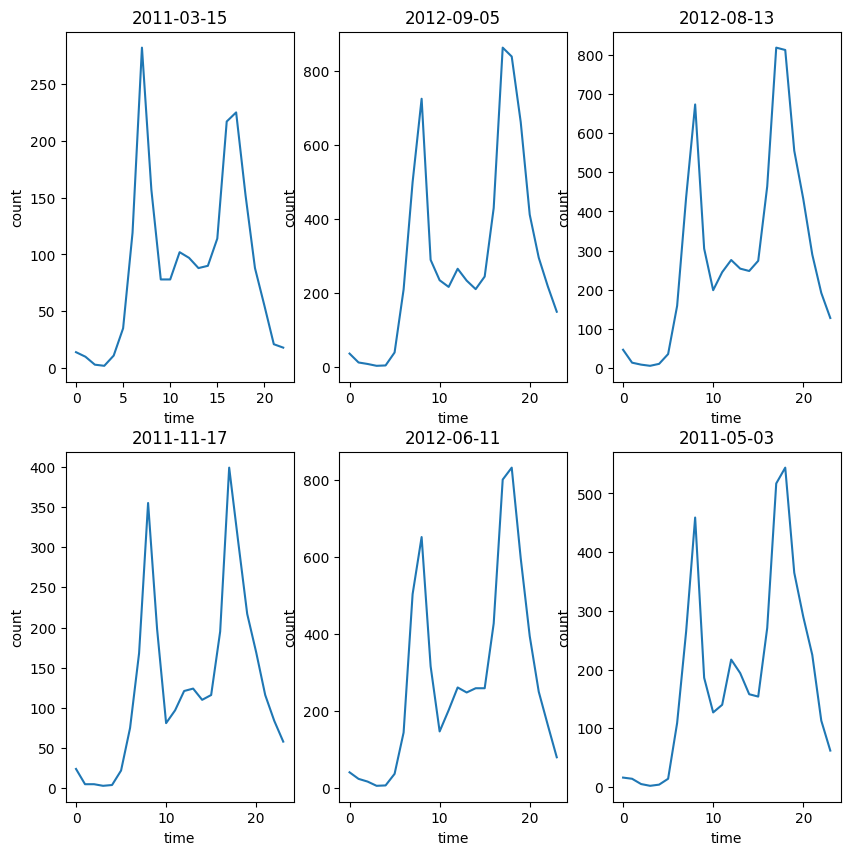

In [20]:
x=1
plt.figure(figsize=(10,10))
for i in range(6):
    d=np.random.choice(df[df['workingday']==1]['datetime'].dt.date)
    data=df[df['datetime'].dt.date==d].copy()
    data['time']=list(range(len(data)))
    plt.subplot(2,3,x)
    plt.title(d)
    sns.lineplot(data=data,x='time',y='count')
    x=x+1
plt.show()

Distribution of number of rented bikes in every hour on randomly selected non working days

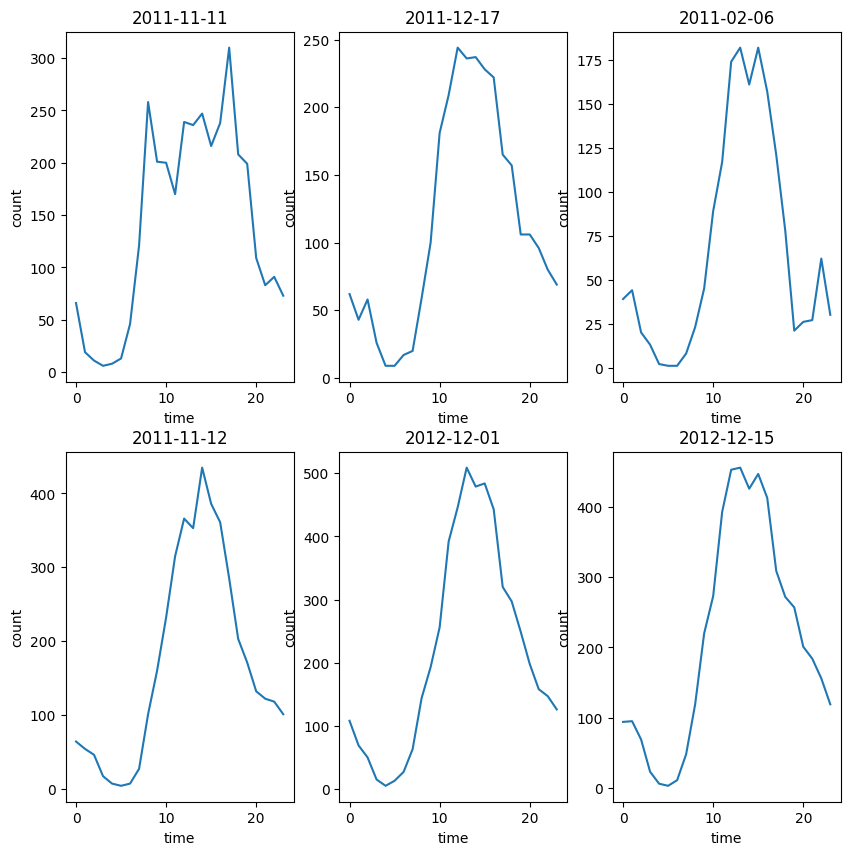

In [21]:
x=1
plt.figure(figsize=(10,10))
for i in range(6):
    d=np.random.choice(df[df['workingday']==0]['datetime'].dt.date)
    data=df[df['datetime'].dt.date==d].copy()
    data['time']=list(range(len(data)))
    plt.subplot(2,3,x)
    plt.title(d)
    sns.lineplot(data=data,x='time',y='count')
    x=x+1
plt.show()

By observing distribution of number of rented bikes in working and non working days, on working day morning and evening hours had rented bikes in maximum but not in afternoon and late nights where as on non working days from morning to evening it is in maximum but not gone as peak as in working day.

<Axes: xlabel='weather', ylabel='count'>

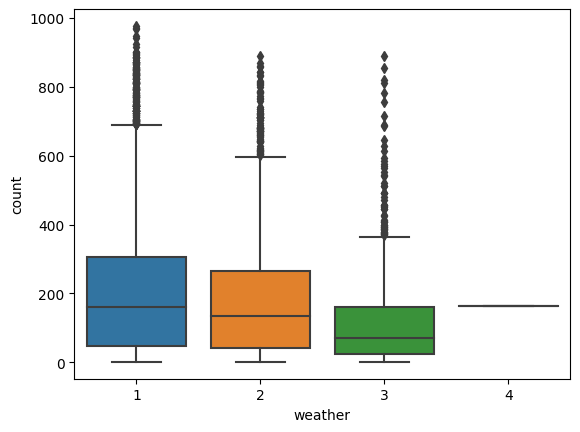

In [22]:
sns.boxplot(data=df,x='weather',y='count')

Boxplot showed that weather 1 had highest median and also maximum rented cycles are booked.
For weather 4 there is only 1 record.

In [23]:
df[df['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


In [24]:
df.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In the data most of the hours(7192) weather is 1 only 1 hour is recorded as weather 4.

<Axes: xlabel='weather', ylabel='count'>

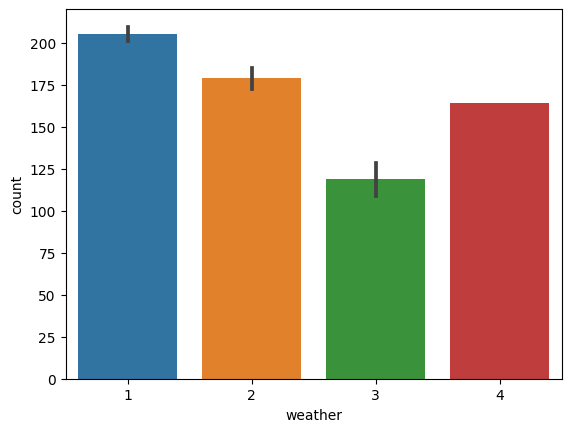

In [25]:
sns.barplot(data=df,x='weather',y='count',estimator='mean')

Bar graph shows the mean number of rented cycles in weather category.

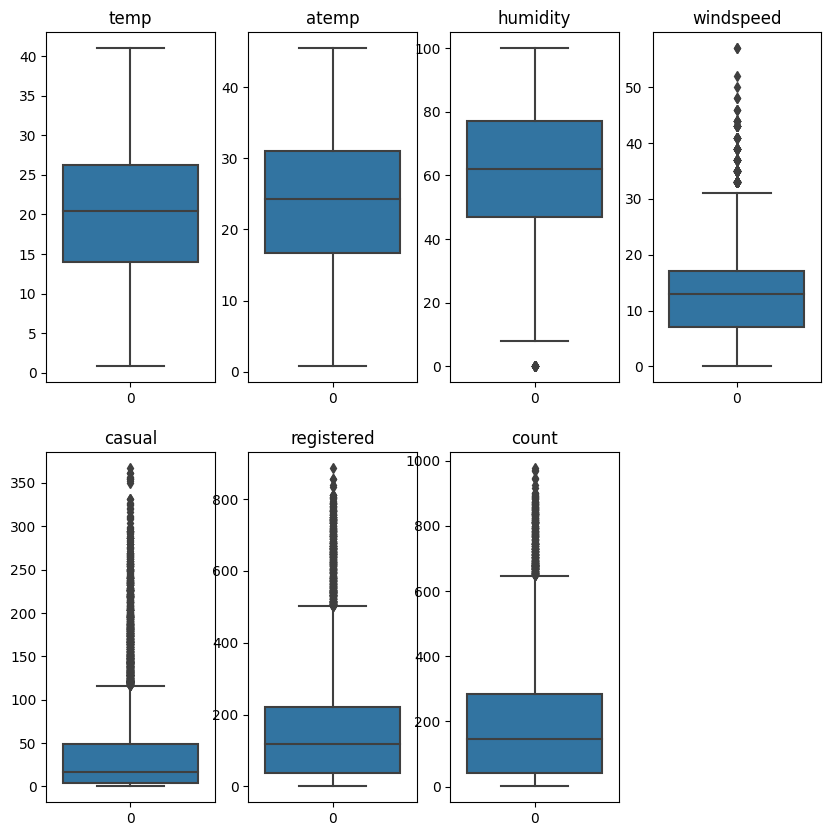

In [26]:
x=1
plt.figure(figsize=(10,10))
for i in df.columns[5:]:
    plt.subplot(2,4,x)
    plt.title(i)
    sns.boxplot(df[i])
    x=x+1
plt.show()

50% hours are recorded temperature of 14 to 26 degrees celsius similarly to other variables information will be in above boxplots.

In [27]:
df.columns[5:]

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

Above variables are continuos variables checking the correlation betwwen these variables.

<Axes: >

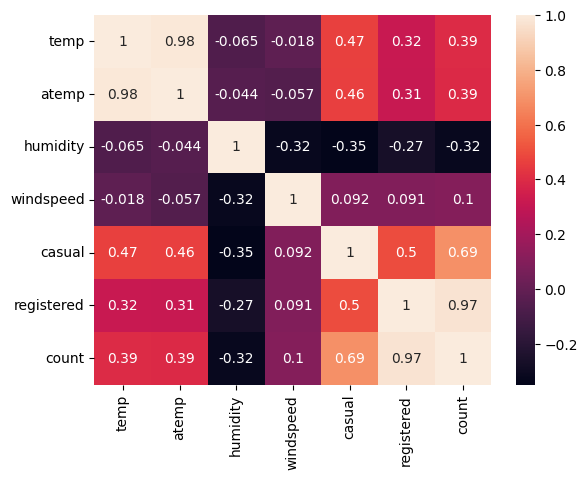

In [28]:
sns.heatmap(df.iloc[:,5:].corr(),annot=True)

only temp,atemp and count,registered variables are strongly correlated.

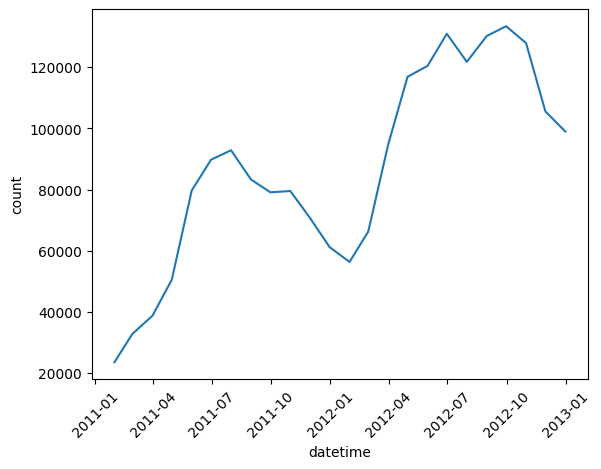

In [29]:
sns.lineplot(day_count.groupby(pd.Grouper(key='datetime',freq='m'))['count'].sum())
plt.xticks(rotation=45)
plt.show()

Above graph shows the trend on number of rented bikes from given time period.

<Axes: xlabel='season', ylabel='count'>

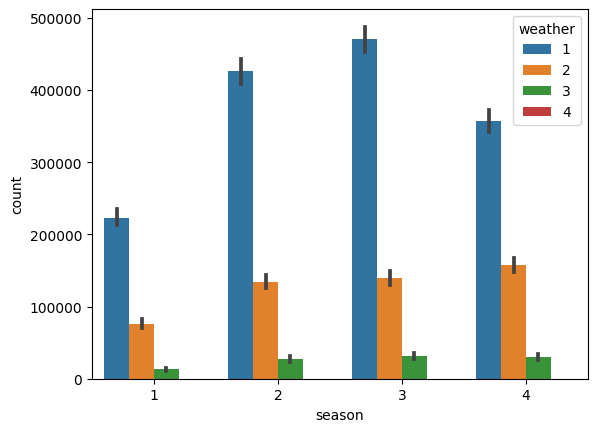

In [30]:
sns.barplot(data=df,x='season',y='count',hue='weather',estimator='sum')

Above dodged bar plot shows number of cycles rented in each season and within each season number of rented cycles in each weather condition.

hypothesis testing

2 Sample T_test


         To check if Working Day has an effect on the number of electric cycles rented

In [31]:
from scipy.stats import ttest_ind

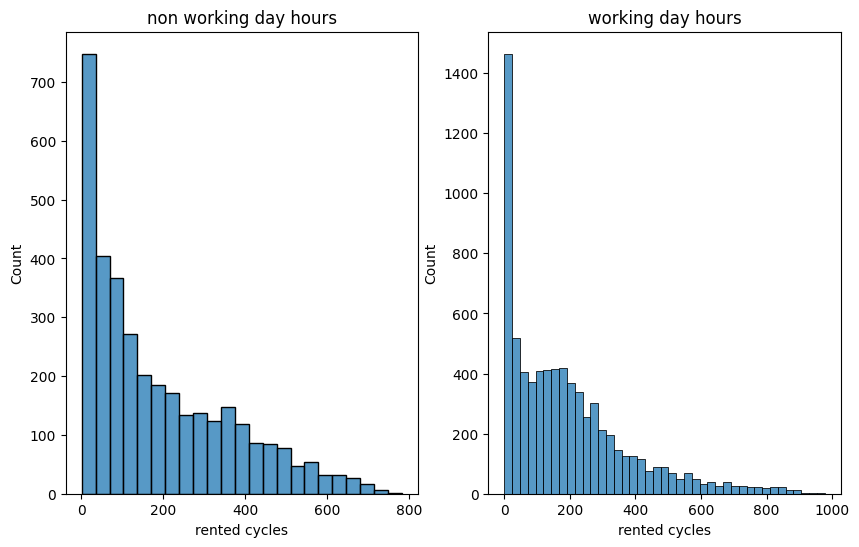

In [32]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('non working day hours')
sns.histplot(df[df['workingday']==0]['count'])
plt.xlabel('rented cycles')
plt.subplot(1,2,2)
plt.title('working day hours')
sns.histplot(df[df['workingday']==1]['count'])
plt.xlabel('rented cycles')
plt.show()

Above distributions are not normal

checking distributions for working and non working days for daywise

In [33]:
data1=df.groupby([df['datetime'].dt.date,'workingday'])['count'].sum().reset_index()
data1

,datetime,workingday,count
0,2011-01-01,0,985
1,2011-01-02,0,801
2,2011-01-03,1,1349
3,2011-01-04,1,1562
4,2011-01-05,1,1600
...,...,...,...
451,2012-12-15,0,5047
452,2012-12-16,0,3786
453,2012-12-17,1,4585
454,2012-12-18,1,5557


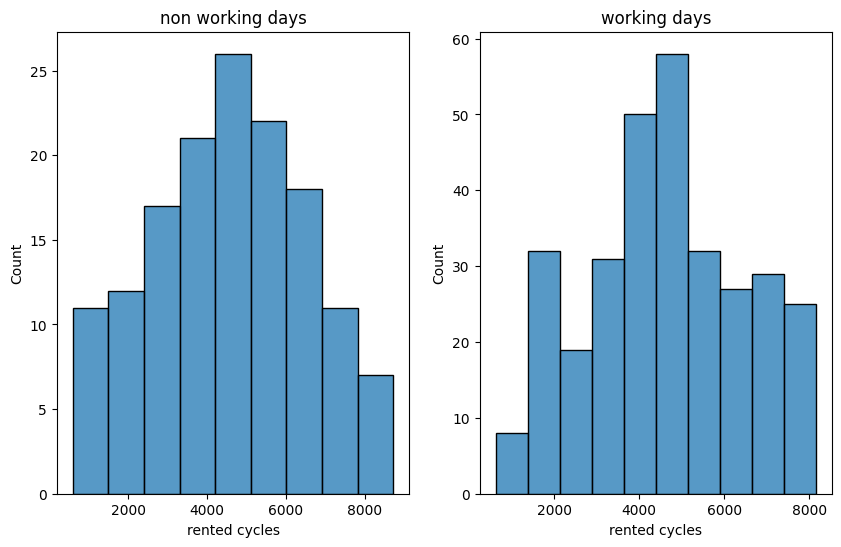

In [34]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('non working days')
sns.histplot(data1[data1['workingday']==0]['count'])
plt.xlabel('rented cycles')
plt.subplot(1,2,2)
plt.title('working days')
sns.histplot(data1[data1['workingday']==1]['count'])
plt.xlabel('rented cycles')
plt.show()

checking 2 samples for normal distribution

QQplot

In [35]:
from statsmodels.graphics.gofplots import qqplot

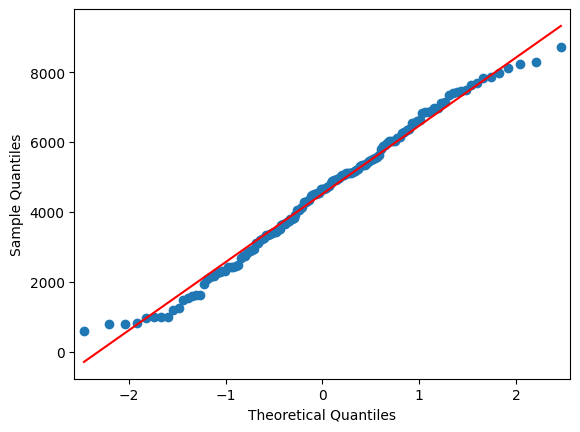

In [36]:
qqplot(data1.query('workingday==0')['count'],line='s')
plt.show()

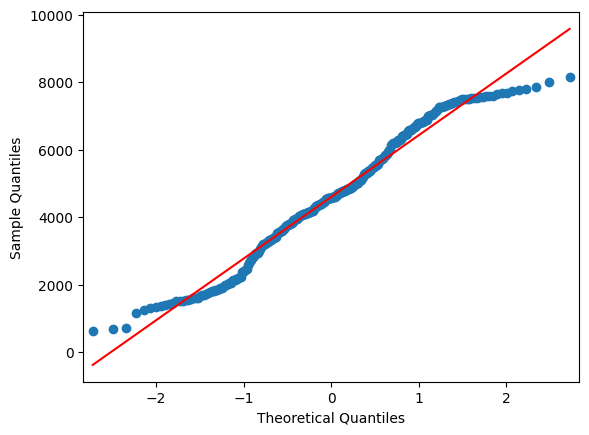

In [37]:
qqplot(data1.query('workingday==1')['count'],line='s')
plt.show()

Shapiro test

In [38]:
# for working days sample
from scipy.stats import shapiro
# H0: data is same as normal distribution
# Ha: data is significantly different from normal distribution
stat,pvalue=shapiro(data1.query('workingday==1')['count'])
print(stat,pvalue)
if pvalue<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

0.9740036129951477 2.0652621969929896e-05
reject null hypothesis


for working days sample distribution is not a normal distribution

In [39]:
# for non working days sample
# H0: data is same as normal distribution
# Ha: data is significantly different from normal distribution
stat,pvalue=shapiro(data1.query('workingday==0')['count'])
print(stat,pvalue)
if pvalue<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

0.9835585355758667 0.0804058164358139
fail to reject null hypothesis


for non working day sample distribution it follows normal distribution

In [40]:
data1.groupby('workingday')['count'].mean()

workingday
0    4516.358621
1    4600.012862
Name: count, dtype: float64

The means of workinday and non workingday samples were not had much difference

Testing these two samples to know the means of them are significantly different are not with 0.05% significance.

In [41]:
# H0: means are same
# Ha: means are significantly different
from scipy.stats import ttest_ind
t_stat,pvalue=ttest_ind(data1.query('workingday==0')['count'],data1.query('workingday==1')['count'])
print(t_stat,pvalue)
if pvalue<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

-0.44477221614881995 0.656696335987859
fail to reject null hypothesis


Test result is to fail to reject null hypothesis that is samples for working days and non working days means are not significantly different they are same

Rented cycles on working and non working days number is nearly same

Annova Test
    
    To check if weather has an effect on number of cycles rented.

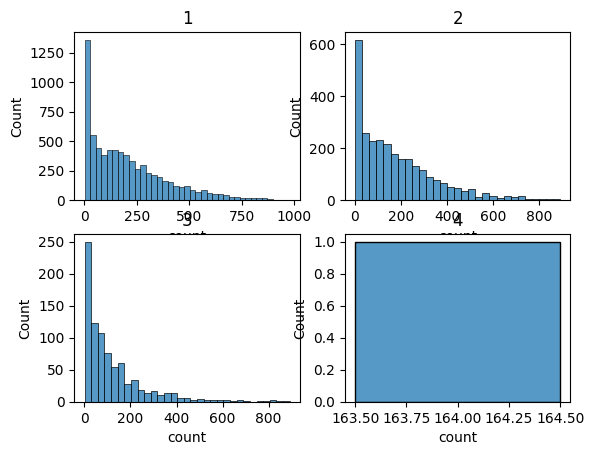

In [42]:
x=1
for i in df['weather'].unique():
    plt.subplot(2,2,x)
    plt.title(i)
    sns.histplot(df[df['weather']==i]['count'])
    x=x+1
plt.show()

Above distribution shows that any of them are not following normal distribution.

Analysis on dailywise weather to number of rented cycles

In [43]:
data2=df.groupby([df['datetime'].dt.date,'weather'])['count'].sum().reset_index()
data2

,datetime,weather,count
0,2011-01-01,1,305
1,2011-01-01,2,608
2,2011-01-01,3,72
3,2011-01-02,1,165
4,2011-01-02,2,417
...,...,...,...
963,2012-12-17,3,354
964,2012-12-18,1,5204
965,2012-12-18,2,40
966,2012-12-18,3,313


In each day weather categories have different number of hours so going with mean of each day to each weather category analysis will be meaningful to compare weather category.

In [44]:
data2=df.groupby([df['datetime'].dt.date,'weather'])['count'].mean().reset_index()
data2

,datetime,weather,count
0,2011-01-01,1,25.416667
1,2011-01-01,2,60.800000
2,2011-01-01,3,36.000000
3,2011-01-02,1,27.500000
4,2011-01-02,2,34.750000
...,...,...,...
963,2012-12-17,3,118.000000
964,2012-12-18,1,260.200000
965,2012-12-18,2,13.333333
966,2012-12-18,3,313.000000


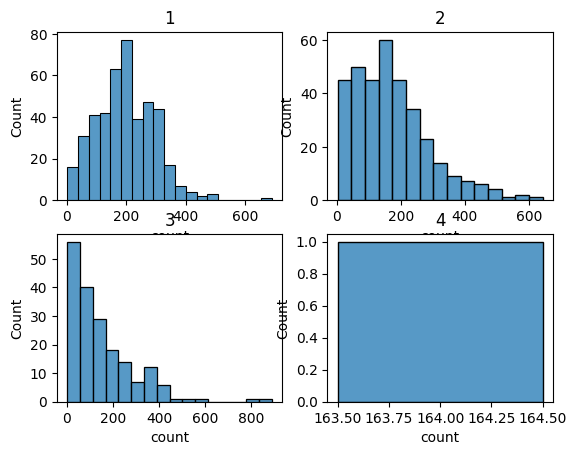

In [45]:
x=1
for i in data2['weather'].unique():
    plt.subplot(2,2,x)
    plt.title(i)
    sns.histplot(data2[data2['weather']==i]['count'])
    x=x+1
plt.show()

Above distributions are not seems like normal distribution 

Testing the Three groups weather 1,2,3 for normal distribution, weather 4 is recorded only one time in two years data.

QQplot

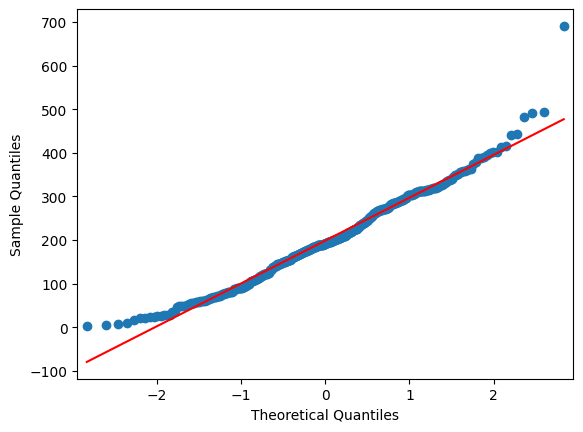

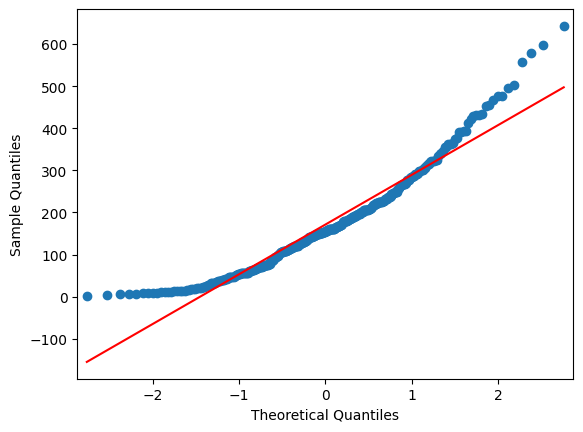

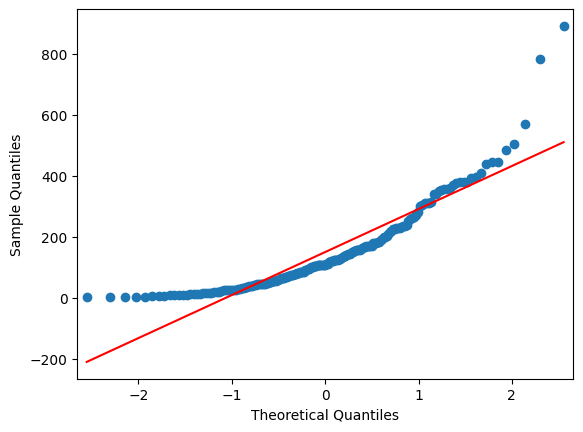

In [46]:
for i in data2['weather'].unique()[:3]:
    qqplot(data2[data2['weather']==i]['count'],line='s')
    plt.show()

Shapiro Test

In [47]:
#H0: sample is normal distribution
#Ha: sample is different from normal distribution
stat,pvalue=shapiro(data2.query('weather==1')['count'])
print(stat,pvalue)
if pvalue<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

0.9792435765266418 7.203217137430329e-06
reject null hypothesis


Weather 1 sample means data is significantly different from normal distribution.

In [48]:
#H0: sample is normal distribution
#Ha: sample is different from normal distribution
stat,pvalue=shapiro(data2.query('weather==2')['count'])
print(stat,pvalue)
if pvalue<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

0.9350403547286987 3.7712159783875876e-11
reject null hypothesis


Weather 2 sample means data is significantly different from normal distribution.

In [49]:
#H0: sample is normal distribution
#Ha: sample is different from normal distribution
stat,pvalue=shapiro(data2.query('weather==3')['count'])
print(stat,pvalue)
if pvalue<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

0.8367562890052795 3.31326003959187e-13
reject null hypothesis


Weather 3 sample means data is significantly different from normal distribution.

3 groups are not normal distribution hence Annova test assumptions are failed.

Levene Test

    To check variences of all groups same or not.

In [50]:
#H0: variences are same
#Ha: variences are significantly different
from scipy.stats import levene
a,b,c,d=data2.query('weather==1')['count'],data2.query('weather==2')['count'],data2.query('weather==3')['count'],data2.query('weather==4')['count']
stat,pvalue=levene(a,b,c,d)
print(stat,pvalue)
if pvalue<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

4.294739988579725 0.005076655965150632
reject null hypothesis


Levene test result is variences of 4 groups are not same.

Doing annova and also kruskal wallis test both

In [51]:
data2.groupby('weather')['count'].mean()

weather
1    198.770202
2    171.067069
3    149.798631
4    164.000000
Name: count, dtype: float64

Means of 4 groups are slightly different

Testing are these 4 groups are significantly different with 5% significance.

In [52]:
# H0: means are same
# Ha: means are significantly different
from scipy.stats import f_oneway
a=data2.query('weather==1')['count']
b=data2.query('weather==2')['count']
c=data2.query('weather==3')['count']
d=data2.query('weather==4')['count']
t_stat,pvalue=f_oneway(a,b,c,d)
print(t_stat,pvalue)
if pvalue<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

8.856249302466853 8.566076221278323e-06
reject null hypothesis


Annova test results that every day mean of rented cycles for different weather conditions are significantly different.

Kruskal wallis test

In [53]:
# H0: means are same
# Ha: means are significantly different
from scipy.stats import kruskal
a=data2.query('weather==1')['count']
b=data2.query('weather==2')['count']
c=data2.query('weather==3')['count']
d=data2.query('weather==4')['count']
t_stat,pvalue=kruskal(a,b,c,d)
print(t_stat,pvalue)
if pvalue<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

52.66266497608276 2.1635293820480026e-11
reject null hypothesis


kruskal test result is also same as annova test

Annova Test

        To check if season had an effect on number of rented cycles.
        using data of each day number of cycles were rented.

In [54]:
data3=df.groupby([df['datetime'].dt.date,'season'])['count'].sum().reset_index()
data3

,datetime,season,count
0,2011-01-01,1,985
1,2011-01-02,1,801
2,2011-01-03,1,1349
3,2011-01-04,1,1562
4,2011-01-05,1,1600
...,...,...,...
451,2012-12-15,4,5047
452,2012-12-16,4,3786
453,2012-12-17,4,4585
454,2012-12-18,4,5557


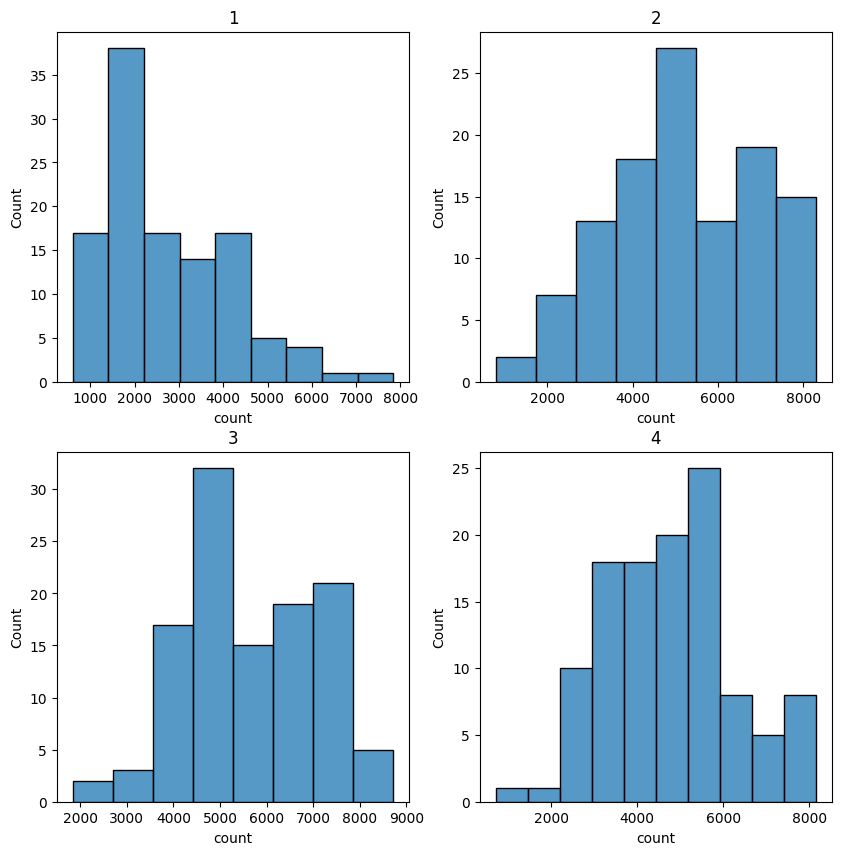

In [55]:
x=1
plt.figure(figsize=(10,10))
for i in data3['season'].unique():
    plt.subplot(2,2,x)
    plt.title(i)
    sns.histplot(data3[data3['season']==i]['count'])
    x=x+1
plt.show()

Above samples are not seems like normal distribution.

Checking the samples are they same as normal distribution.

QQplot

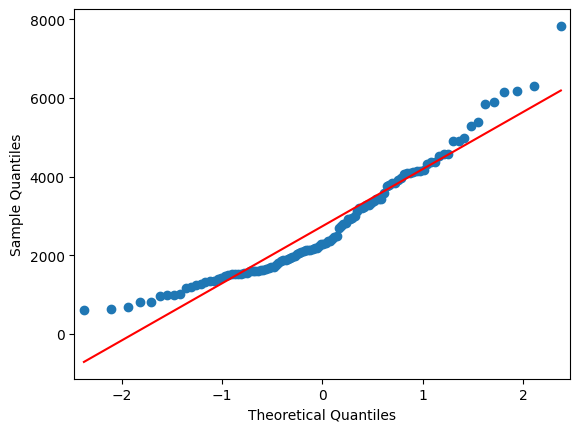

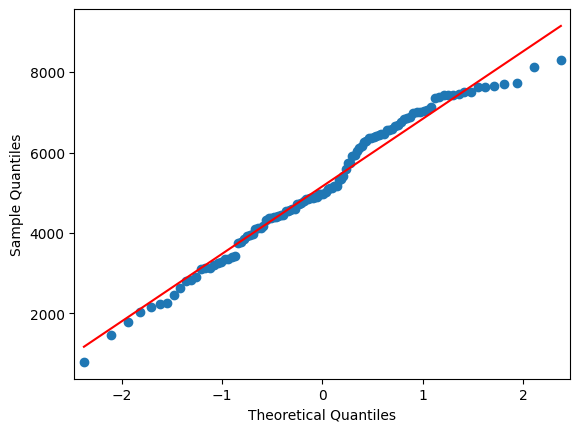

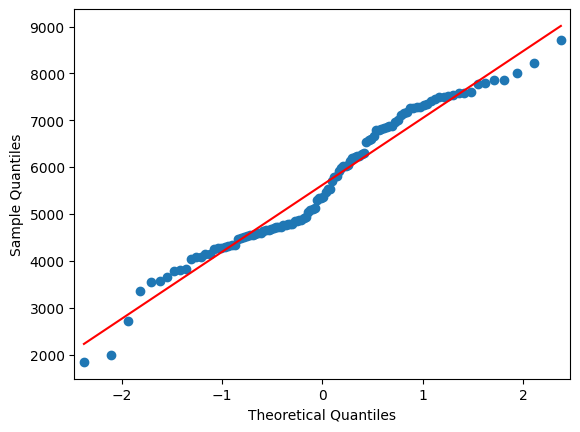

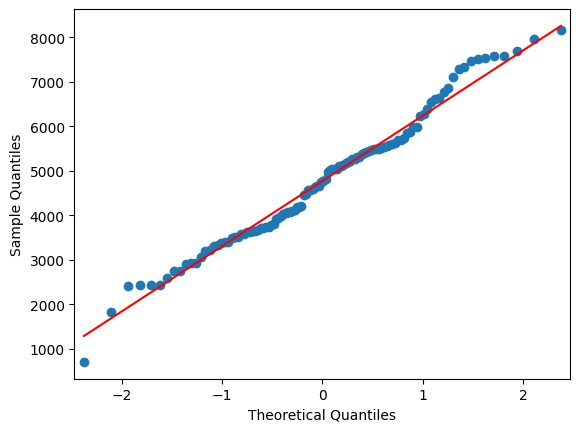

In [56]:
for i in data3['season'].unique():
    qqplot(data3[data3['season']==i]['count'],line='s')
    plt.show()

Statistical testing with 5%significance by shapiro test.

In [57]:
#H0: sample is same as normal distribution
#Ha: sample is significantly different from normal distribution
stat,pvalue=shapiro(data3.query('season==1')['count'])
print(stat,pvalue)
if pvalue<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

0.9294025301933289 1.4321534763439558e-05
reject null hypothesis


In [58]:
#H0: sample is same as normal distribution
#Ha: sample is significantly different from normal distribution
stat,pvalue=shapiro(data3.query('season==2')['count'])
print(stat,pvalue)
if pvalue<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

0.9752597212791443 0.032791439443826675
reject null hypothesis


In [59]:
#H0: sample is same as normal distribution
#Ha: sample is significantly different from normal distribution
stat,pvalue=shapiro(data3.query('season==3')['count'])
print(stat,pvalue)
if pvalue<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

0.9641115069389343 0.003765953006222844
reject null hypothesis


In [60]:
#H0: sample is same as normal distribution
#Ha: sample is significantly different from normal distribution
stat,pvalue=shapiro(data3.query('season==4')['count'])
print(stat,pvalue)
if pvalue<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

0.9835520386695862 0.17639805376529694
fail to reject null hypothesis


season 4 group is only normal distribution.

Levene Test 
        
    
    To check the 4 samples varience are same or not.

In [61]:
data3.groupby('season')['count'].var()

season
1    2.125813e+06
2    2.836523e+06
3    2.054283e+06
4    2.166032e+06
Name: count, dtype: float64

In [62]:
#H0: variences are same
#Ha: variences are significantly different
from scipy.stats import levene
a,b,c,d=data3.query('season==1')['count'],data3.query('season==2')['count'],data3.query('season==3')['count'],data3.query('season==4')['count']
stat,pvalue=levene(a,b,c,d)
print(stat,pvalue)
if pvalue<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

1.5071252673249398 0.21194448921499898
fail to reject null hypothesis


Levene test result is variences of 4 samples are same.

Annova Test

In [63]:
#H0: means of 4 groups are same
#Ha:means of 4 groups are significantly different
a=data3.query('season==1')['count']
b=data3.query('season==2')['count']
c=data3.query('season==3')['count']
d=data3.query('season==4')['count']
Fstat,pvalue=f_oneway(a,b,c,d)
print(Fstat,pvalue)
if pvalue<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

80.0504789788067 1.506580502991204e-41
reject null hypothesis


Annova test result is season has an effect on number of cycles rented.

Kruskal Wallis Test

In [64]:
#H0: means of 4 groups are same
#Ha:means of 4 groups are significantly different
a=data3.query('season==1')['count']
b=data3.query('season==2')['count']
c=data3.query('season==3')['count']
d=data3.query('season==4')['count']
kstat,pvalue=kruskal(a,b,c,d)
print(kstat,pvalue)
if pvalue<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

152.13785107938023 9.111105591373848e-33
reject null hypothesis


Kruskal Test result is also same as Annova Test

chisquared Test


        To check that an association exists in between season and weather.

In [65]:
data4=pd.crosstab(df['season'],df['weather'])
data4

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [66]:
from scipy.stats import chi2_contingency
#H0: No association exits
#Ha: association exists
chistat,pvalue,dof,expfreq=chi2_contingency(data4)
print(chistat,pvalue,dof,expfreq)
if pvalue<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

49.158655596893624 1.549925073686492e-07 9 [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
reject null hypothesis


chisquare test result tells that there is strong association in b/w weather and season.